In [1]:
!pip install NetworkX

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
import random
from numpy import random as nprand
seed = hash("Network Science in Python") % 2**32
nprand.seed(seed)
random.seed(seed)

In [18]:
G = nx.Graph()

In [19]:
G.add_node('A')

In [20]:
G.add_nodes_from(['B', 'C','D','E'])

In [21]:
G.add_edges_from([('B', 'C'),('A','B'),('C','E'),('C','D'),('B','E'),('A','D'), ('A', 'C')])

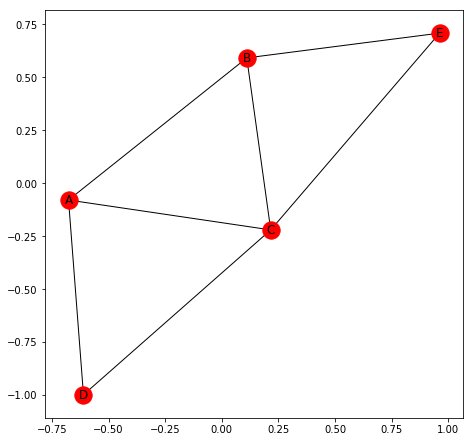

In [22]:
plt.figure(figsize=(7.5, 7.5))
nx.draw_networkx(G)
plt.show()

In [4]:
nodelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/f989e10af17fb4c85b11409fea47895b/raw/a3a8da0fa5b094f1ca9d82e1642b384889ae16e8/nodelist_sleeping_giant.csv')

In [8]:
# Grab edge list data hosted on Gist
edgelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')

In [5]:
# Preview nodelist
nodelist.head(5)

,id,X,Y
0,b_bv,1486,732
1,b_bw,716,1357
2,b_end_east,3164,1111
3,b_end_west,141,1938
4,b_g,1725,771


In [6]:
# Create empty graph
g = nx.Graph()

In [9]:
# Add edges and edge attributes
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

In [10]:
# Edge list example
print(elrow[0]) # node1
print(elrow[1]) # node2
print(elrow[2:].to_dict()) # edge attribute dict

o_gy2
y_gy2
{'trail': 'gy2', 'distance': 0.12, 'color': 'yellowgreen', 'estimate': 0}


In [12]:
# Add node attributes
for i, nlrow in nodelist.iterrows():
    g.node[nlrow['id']].update(nlrow[1:].to_dict())

In [14]:
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in g.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
dict(list(node_positions.items())[0:5])

{'rs_end_north': (1772, -172),
 'v_rs': (1793, -484),
 'b_rs': (1747, -700),
 'g_rs': (1676, -775),
 'w_rs': (1646, -947)}

In [21]:
# Define data structure (list) of edge colors for plotting
edge_colors = [e['color'] for e in g.edges(data=True)]

# Preview first 10
#edge_colors[0:10]

In [22]:
plt.figure(figsize=(8, 6))
nx.draw(g, pos=node_positions, edge_color=edge_colors, node_size=10, node_color='black')
plt.title('Graph Representation of Sleeping Giant Trail Map', size=15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


ValueError: Collections can only map rank 1 arrays

<Figure size 576x432 with 1 Axes>